# Digit recognizer
## Author: Nicolas Hernandez Zapata
### Description
Use machine learning to create a model thatrecognize the digit in the MINST dataset

Model Exploration

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (42000, 785)


In [5]:
df["label"].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In this dataset various models will be tested in order to find the one that predict the best in its default options. 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [7]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## Random forest classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_pred = forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       816
           1       0.98      0.99      0.98       909
           2       0.97      0.96      0.96       846
           3       0.96      0.94      0.95       937
           4       0.95      0.97      0.96       839
           5       0.96      0.95      0.96       702
           6       0.98      0.98      0.98       785
           7       0.96      0.95      0.96       893
           8       0.95      0.95      0.95       835
           9       0.94      0.94      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [26]:
forest_acc = accuracy_score(y_test, y_pred)

## Gaussian Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [29]:
y_pred = GNB.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       816
           1       0.75      0.96      0.84       909
           2       0.90      0.25      0.39       846
           3       0.72      0.41      0.52       937
           4       0.85      0.17      0.29       839
           5       0.65      0.09      0.16       702
           6       0.59      0.95      0.73       785
           7       0.91      0.34      0.49       893
           8       0.32      0.62      0.43       835
           9       0.39      0.94      0.55       838

    accuracy                           0.57      8400
   macro avg       0.68      0.56      0.52      8400
weighted avg       0.69      0.57      0.53      8400



In [30]:
GNB_acc = accuracy_score(y_test, y_pred)

## Bernoulli Naive Bayes

In [31]:
from sklearn.naive_bayes import BernoulliNB

In [32]:
BNB = BernoulliNB()
BNB.fit(X_train, y_train)

BernoulliNB()

In [33]:
y_pred = BNB.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       816
           1       0.87      0.97      0.92       909
           2       0.87      0.81      0.84       846
           3       0.77      0.79      0.78       937
           4       0.81      0.80      0.81       839
           5       0.78      0.68      0.73       702
           6       0.88      0.89      0.88       785
           7       0.92      0.84      0.88       893
           8       0.78      0.77      0.77       835
           9       0.73      0.81      0.77       838

    accuracy                           0.83      8400
   macro avg       0.83      0.83      0.83      8400
weighted avg       0.83      0.83      0.83      8400



In [34]:
BNB_acc = accuracy_score(y_test, y_pred)

## Linear Discriminant Analysis

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [60]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [61]:
y_pred = LDA.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       816
           1       0.87      0.97      0.92       909
           2       0.92      0.78      0.85       846
           3       0.87      0.83      0.85       937
           4       0.84      0.91      0.88       839
           5       0.79      0.81      0.80       702
           6       0.90      0.91      0.91       785
           7       0.93      0.82      0.87       893
           8       0.81      0.81      0.81       835
           9       0.79      0.87      0.82       838

    accuracy                           0.87      8400
   macro avg       0.87      0.87      0.86      8400
weighted avg       0.87      0.87      0.87      8400



In [62]:
LDA_acc = accuracy_score(y_test, y_pred)

## KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred = KNN.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.94      1.00      0.97       909
           2       0.99      0.94      0.96       846
           3       0.96      0.96      0.96       937
           4       0.98      0.97      0.98       839
           5       0.96      0.95      0.96       702
           6       0.97      0.99      0.98       785
           7       0.96      0.96      0.96       893
           8       0.99      0.93      0.96       835
           9       0.94      0.95      0.95       838

    accuracy                           0.96      8400
   macro avg       0.97      0.96      0.96      8400
weighted avg       0.97      0.96      0.96      8400



In [41]:
KNN_acc = accuracy_score(y_test, y_pred)

## Support Vector Machines

In [44]:
from sklearn.svm import LinearSVC

In [45]:
SVM = LinearSVC()
SVM.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [46]:
y_pred = SVM.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       816
           1       0.95      0.97      0.96       909
           2       0.89      0.85      0.87       846
           3       0.94      0.71      0.81       937
           4       0.90      0.86      0.88       839
           5       0.80      0.76      0.78       702
           6       0.92      0.93      0.93       785
           7       0.92      0.88      0.90       893
           8       0.68      0.89      0.77       835
           9       0.81      0.88      0.84       838

    accuracy                           0.87      8400
   macro avg       0.87      0.87      0.87      8400
weighted avg       0.88      0.87      0.87      8400



In [47]:
SVM_acc = accuracy_score(y_test, y_pred)

## Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)

GradientBoostingClassifier()

In [50]:
y_pred = GBC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.97      0.99      0.98       909
           2       0.94      0.93      0.94       846
           3       0.93      0.91      0.92       937
           4       0.93      0.95      0.94       839
           5       0.93      0.92      0.93       702
           6       0.95      0.96      0.96       785
           7       0.95      0.93      0.94       893
           8       0.93      0.93      0.93       835
           9       0.90      0.92      0.91       838

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



In [51]:
GBC_acc = accuracy_score(y_test, y_pred)

## Histogram Based Gradient Boosting Classifier

In [52]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [53]:
histogram = HistGradientBoostingClassifier()
histogram.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [54]:
y_pred = histogram.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       816
           1       0.99      0.99      0.99       909
           2       0.97      0.97      0.97       846
           3       0.97      0.96      0.96       937
           4       0.97      0.97      0.97       839
           5       0.97      0.96      0.96       702
           6       0.98      0.99      0.98       785
           7       0.98      0.97      0.98       893
           8       0.96      0.98      0.97       835
           9       0.95      0.97      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [55]:
histogram_acc = accuracy_score(y_test, y_pred)

In [56]:
type(histogram_acc)

numpy.float64

## Model Comparison

In [57]:
import matplotlib.pyplot as plt

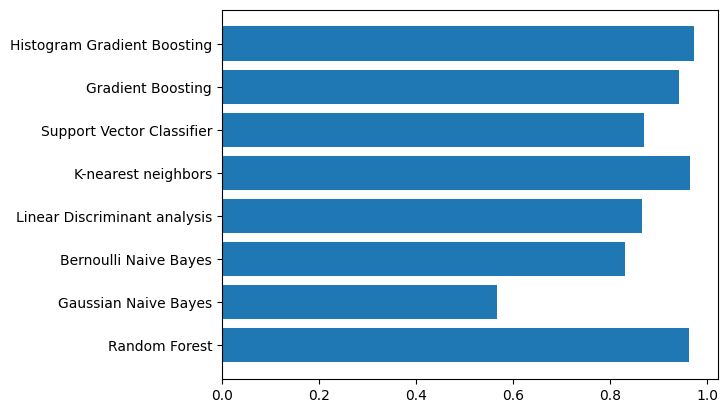

In [67]:
scores = [forest_acc, GNB_acc, BNB_acc, LDA_acc, KNN_acc, SVM_acc, GBC_acc, histogram_acc]
names = ['Random Forest', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes', 'Linear Discriminant analysis',
        'K-nearest neighbors', 'Support Vector Classifier', 'Gradient Boosting', 'Histogram Gradient Boosting']
plt.figure()
plt.barh(names, scores )
plt.show()

From the previous bar plot, it is clear that the best 3 models show very similar accuracy behaviour. Which is almost perfect in the classification task.

Except the Gaussian Naive Bayes, the models perform well in this dataset which is particularly easy. 

Now we will take the top 3 models (Histogram Gradient Boosting, KNN and Random Forest) and perform an hyperparameters tuning to see if the results continue improving. Also a combination of these 3 models will be done

## Testing Results

The 3 models were tested in the competition test set.
* Random Forest: 0.96357
* KNN: 0.96507
* Histogram Gradient Boosting: 0.97135